In [20]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import cv2

In [27]:
tanuj = "#"
assert tanuj

In [22]:
vision_base_url = "https://centralindia.api.cognitive.microsoft.com/vision/v2.0/"

In [23]:
analyze_url = vision_base_url + "analyze"

In [24]:
def capture_image():
    # capture1=cv2.VideoCapture(0)
    capture=cv2.VideoCapture(0)
    ret,frame=capture.read()
    cv2.imwrite('check.jpeg',frame)

A man wearing glasses


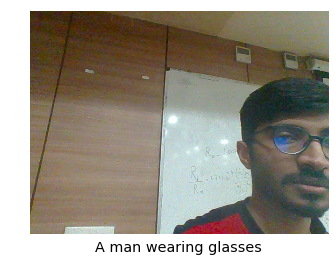

A boy taking a selfie in a room


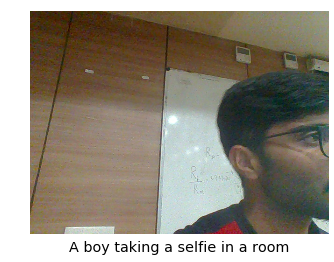

A person posing for the camera


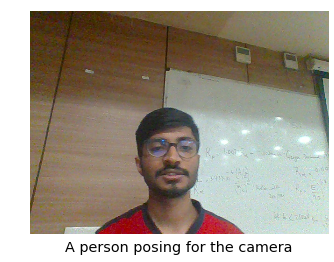

A man wearing glasses


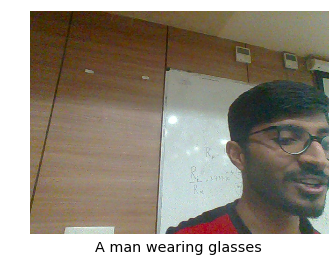

A man wearing glasses


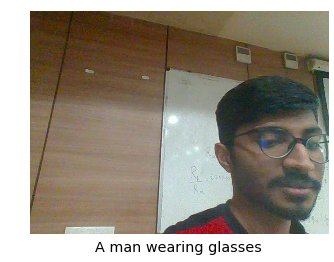

A person taking a selfie in a room


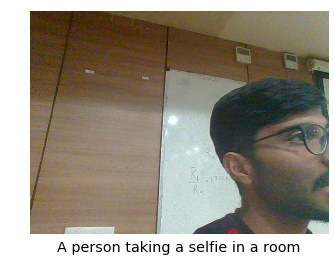

A person taking a selfie in a room


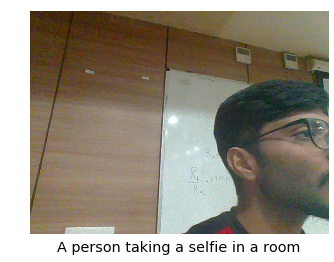

KeyboardInterrupt: 

In [28]:
while(1):
# Set image_path to the local path of an image that you want to analyze.
    capture_image()
    image_path = "check.jpeg"

    # Read the image into a byte array
    image_data = open(image_path, "rb").read()
    headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
                'Content-Type': 'application/octet-stream'}
    params     = {'visualFeatures': 'Categories,Description,Color'}
    response = requests.post(
        analyze_url, headers=headers, params=params, data=image_data)
    response.raise_for_status()

    # The 'analysis' object contains various fields that describe the image. The most
    # relevant caption for the image is obtained from the 'description' property.
    analysis = response.json()
    image_caption = analysis["description"]["captions"][0]["text"].capitalize()
    image = Image.open(BytesIO(image_data))
    plt.imshow(image)
    plt.axis("off")
    _ = plt.title(image_caption, size="x-large", y=-0.1)
    print(image_caption)

    # Display the image and overlay it with the caption.
    plt.ion()
    image = Image.open(BytesIO(image_data))
    plt.imshow(image)
    plt.axis("off")
    _ = plt.title(image_caption, size="x-large", y=-0.1)
    plt.show()
    plt.close()